# Window Functions




## What is a Window Function?

A window function refers to a type of operation that allows you to perform calculations across subsets of data in a DataFrame or a database table. The term `window` simply expresses that we consider a selection of data (as seen through a window).

## Use Cases for Window Functions

### Aggregate Functions

A straightforward and commonly used way to apply window functions are aggregate functions. Common functions used with windows include sum, mean, median, variance, standard deviation, min, and max. You can also define custom functions to apply to the data in the window.

### Data Expansion

Window functions can also be handy if we want to expand the data with new values derived from existing data. For example, imagine you are creating a model to predict the price of houses in your neighbourhood given various information about each house such as the house type (e.g. detached, apartment etc.), floor area (square foot), number of bedrooms, number of bathrooms etc.

One feature you might want to create for your model is to compare the floor area of the current house to the *median* area for a house of that specific type. The hypothesis being: if the house has a larger floor area than the median area for a comparable house type, then it is more likely to be priced at the top end of the market.

In order to calculate this feature we would need to create a new column that, for each row, contains the median house price for the current row's house type. We could then calculate the difference between the house's area and its group median to use as a feature in our model.

This new feature would require a window function that would calculate and return a value for each row in the dataset with the median house price of that group.

The data in the new column can be used in a data analysis context or as an input feature as part of a machine learning approach.


## How to use Window Functions

Window functions are tools that enable complex calculations over subsets of data. They essentially consist of two parts:

*    **Grouping Part**: This is where you define the "window" or subset of data over which you want to perform a calculation. This grouping can be based on various criteria, such as time intervals for time series data, fixed number of rows, or expanding/cumulative windows. The groupby method is a typical way of defining such groups, especially when the grouping is based on certain categorical variables.

*    **Function Part**: Once you have defined the window, you apply a function to each group or window. This function can be an aggregation (like sum or average) or a transformation. The difference is that aggregation returns a single value for each group, while transformation can return a modified version of the original data, keeping the same size.

Examples of Common Functions:

*    **Sum**: Used to calculate the total of values within each group or window. For example, in time series data, you might sum up sales figures for each week.

*    **Average (Mean)**: This function calculates the average of values within each group. For instance, finding the average daily temperature for each month in a dataset.

## Window Functions in Pandas

### **Grouping Part**:

`.groupby` is the basis for window functions in Pandas

### **Function Part**

Commonly used functions that return a single value are the following.
The reason why there is a specific function called `sum` lies in its frequent use.
It just makes it easier from a use perspective to have these functions already implemented.
Below are the main functions listed.

**Pre-Defined Aggregation Functions**

- [**sum()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.sum.html): Computes the sum of group values.
- [**mean()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html): Computes the average of group values.
- [**median()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.median.html): Computes the median of group values.
- [**min()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.min.html): Returns the minimum value in each group.
- [**max()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.max.html): Returns the maximum value in each group.
- [**count()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.count.html): Counts the number of non-NA/null entries in each group.
- [**size()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.size.html): Returns the size of each group.
- [**std()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.std.html): Computes the standard deviation of each group.
- [**var()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.var.html): Computes the variance of each group.
- [**first()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.first.html) / [**last()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.last.html): Returns the first or last value in each group.
- [**agg()** / **aggregate()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html): Allows for multiple aggregation operations simultaneously.

**Custom Transformation Functions**

Next to these pre-defined functions we also have the possibility to apply whatever function we can think of and code up on the selections made with `.groupby`.


- [**transform()**](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html): Applies a function to each group, then places the results in a DataFrame of the same shape.


## Group By Code Sample

The following code shows us how to apply the pre-defined aggregation functions.
If we have a dataframe over a column called  `Quality Class`.



In [2]:
import pandas as pd

# Example DataFrame
df = pd.DataFrame({
    'Quality Class': ['A', 'A', 'B', 'B'],
    'Values': [10, 15, 20, 25]
})

# Using groupby with aggregation
print(df.groupby('Quality Class').sum())



               Values
Quality Class        
A                  25
B                  45


## Exercises Aggregation Functions

The best way to get the hang of groupby is by applying it to some sample datasets.

In [3]:
# Below are some imports that we need in the following exercises
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Alcohol Consumption Dataset

The folder where this notebooks resides in contains a dataset stored in `CSV` format in a file called: `ds_alcohol_consumption.csv`.

### Exercise:

1. Load the dataset with read_csv
2. Use the groupby functionality to calculate aggregations by continent

In [52]:
df = pd.read_csv("ds_alcohol_consumption.csv")
# df = df.drop("country", axis=1)
# df = df[["beer_servings","spirit_servings","wine_servings","total_litres_of_pure_alcohol","continent"]]
# df.groupby("continent").median()

df[df["country"].isin(["Switzerland", "Austria", "Germany", "France", "Italy"])]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
9,Austria,279,75,191,9.7,EU
61,France,127,151,370,11.8,EU
65,Germany,346,117,175,11.3,EU
83,Italy,85,42,237,6.5,EU
166,Switzerland,185,100,280,10.2,EU


## Startup Dataset

The folder where this notebooks resides in contains a dataset stored in `CSV` format in a file called: `ds_startups_100_2020_cbinsights.csv`.

### Exercise:

1. Load the dataset with read_csv
2. Use the `count` or `size` function in combination with groupby applied to `Industry` and `Focus Area` individually.
3. Plot the results of the groupBy aggregation as a barplot (example plot shown below. It is not necessary to match the labels as shown in the plot)

Text(0, 0.5, 'Y-Label')

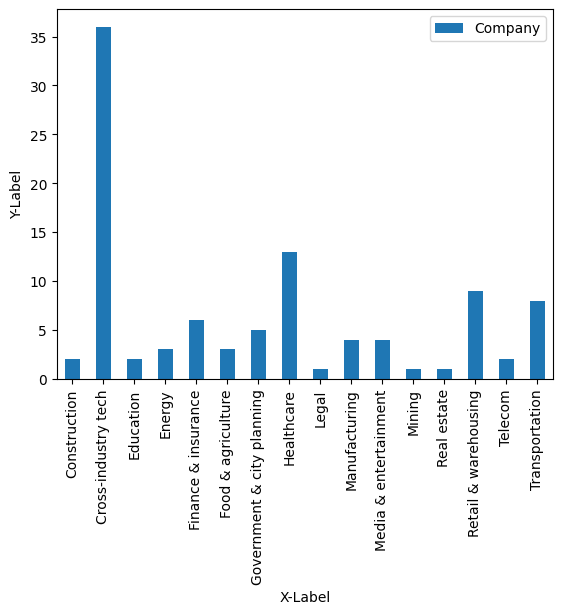

In [50]:
df = pd.read_csv("ds_startups_100_2020_cbinsights.csv", sep=";")
df = df[["Company", "Industry"]].groupby("Industry").count()

ax = df.plot(kind="bar")

ax.set_xlabel("X-Label")
ax.set_ylabel("Y-Label")


## Transform

Let us recapitulate again what is the difference between transform and the aggregations.
Aggregations are applied to sets of rows according to the defined grouping and return a single value (e.g. the average value of this group)
Transformations apply a function to each row's value in the defined grouping. That means, we do not get back a single value for the selected rows, but rather a value for each individual value in rows. If we have a window over 10 rows we will get back 10 values by the transformation.




## The Battery-Electric-Vehicle (BEV) dataset

The folder where this notebooks resides in contains a dataset stored in `CSV` format in a file called: `ds_bev_vehicles.csv`.

The data contained in the dataset looks as follows:
 

| Name                          | Model Code | Country of Origin | Range | kW Power | Price       | Capacity |
|------------------------------|------------|-------------------|-------|----------|-------------|----------|
| Tesla Model 3                | TM3-2022   | USA               | 425   | 170      | $39,990.00  | 5        |
| Nissan Leaf                  | NL-2022    | Japan             | 150   | 80       | $29,990.00  | 5        |
| Chevrolet Bolt               | CB-2022    | USA               | 259   | 150      | $31,995.00  | 5        |
| Hyundai Kona                 | HK-2022    | South Korea       | 258   | 150      | $37,390.00  | 5        |
| Ford Mustang Mach-E         | FMME-2022  | USA               | 270   | 210      | $43,995.00  | 5        |
| Audi e-tron                  | AET-2022   | Germany           | 248   | 300      | $65,900.00  | 5        |
| BMW i3                       | BI3-2022   | Germany           | 153   | 125      | $44,450.00  | 4        |
| Kia Soul EV                  | KSEV-2022  | South Korea       | 243   | 150      | $33,590.00  | 5        |
| Porsche Taycan               | PT-2022    | Germany           | 192   | 300      | $79,900.00  | 4        |

We can use the transform function to exand the dataset.

Exercise:

1. Use transform in combination with groupby to add an additional column to the dataframe that shows the `Range` of each car compared to the average `Range` of car with the same capacity. See the sample output as an example.
2. Apply the same schema to `kw Power` 

Note: This is already quite advanced in terms of thinking and processing dataframes. In other words, this is a harder nut to crack so it is normal that the solution would require some research and tinkering. 

In [46]:
df = pd.read_csv("ds_bev_vehicles.csv")
# df = df[["Capacity", "Range"]].groupby("Capacity").mean()
df["Avg Range per Capacity"] = df.groupby("Capacity")["Range"].transform("mean")
df
df["Range Diff to Capacity Class"] = df["Range"] - df["Avg Range per Capacity"]
df
df["Avg kW Power per Capacity"] = df.groupby("Capacity")["kW Power"].transform("mean")
df
df["kW Power Diff to Capacity Class"] = df["kW Power"] - df["Avg kW Power per Capacity"]
df

,Name,Model Code,Country of Origin,Range,kW Power,Price,Capacity,Avg Range per Capacity,Range Diff to Capacity Class,Avg kW Power per Capacity,kW Power Diff to Capacity Class
0,Tesla Model 3,TM3-2022,USA,425,170,$39990.00,5,286.485714,138.514286,287.314286,-117.314286
1,Nissan Leaf,NL-2022,Japan,150,80,$29990.00,5,286.485714,-136.485714,287.314286,-207.314286
2,Chevrolet Bolt,CB-2022,USA,259,150,$31995.00,5,286.485714,-27.485714,287.314286,-137.314286
3,Hyundai Kona,HK-2022,South Korea,258,150,$37390.00,5,286.485714,-28.485714,287.314286,-137.314286
4,Ford Mustang Mach-E,FMME-2022,USA,270,210,$43995.00,5,286.485714,-16.485714,287.314286,-77.314286
5,Audi e-tron,AET-2022,Germany,248,300,$65900.00,5,286.485714,-38.485714,287.314286,12.685714
6,BMW i3,BI3-2022,Germany,153,125,$44450.00,4,153.000000,0.000000,186.666667,-61.666667
7,Kia Soul EV,KSEV-2022,South Korea,243,150,$33590.00,5,286.485714,-43.485714,287.314286,-137.314286
8,Porsche Taycan,PT-2022,Germany,192,300,$79900.00,4,153.000000,39.000000,186.666667,113.333333
9,Jaguar I-PACE,JIP-2022,UK,234,294,$69500.00,5,286.485714,-52.485714,287.314286,6.685714
